#### Important 'Imports' 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sp
import random 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV

import warnings
warnings.filterwarnings("ignore")

import h5py
import pickle 

# **Data Exploration**

**Batch 1**

In [2]:
batch1 = pickle.load(open(r'./dataset/batch1.pkl', 'rb'))
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

In [3]:
numBat1 = len(batch1.keys())
numBat1

41

**Batch 2**

In [4]:
batch2 = pickle.load(open(r'./dataset/batch2.pkl','rb'))

In [5]:
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

In [6]:
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

In [7]:
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
numBat2

43

**Batch 3**

In [8]:
batch3 = pickle.load(open(r'./dataset/batch3.pkl','rb'))
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

In [9]:
numBat3 = len(batch3.keys())
numBat3

40

In [10]:
numBat = numBat1 + numBat2 + numBat3
numBat

124

# Exploratory Data Analysis 

In [11]:
#Each key represents a battery in the batch 
print(batch1.keys())

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])


In [12]:
#Each battery contains several features/measurements 
batch1['b1c0'].keys()

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])

In [13]:
print(batch1['b1c0']['cycle_life'])
print(batch1['b1c0']['charge_policy'])

[[1852.]]
3.6C(80%)-3.6C


In [14]:
battery1 = pd.DataFrame(batch1['b1c0']['summary'])
battery1.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.016742,1.071042,1.070689,31.875011,29.566130,35.652016,13.341250,2.0
2,0.016724,1.071674,1.071900,31.931490,29.604385,35.692978,13.425777,3.0
3,0.016681,1.072304,1.072510,31.932603,29.744202,35.680588,13.425167,4.0
4,0.016662,1.072970,1.073174,31.959322,29.644709,35.728691,13.341442,5.0


In [15]:
battery1.describe()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
count,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000,1851.000000
mean,0.017020,1.020854,1.021118,32.007037,29.400528,36.316710,13.524102,926.000000
std,0.000806,0.057253,0.057486,1.097500,1.172854,1.155561,0.504128,534.481992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.016737,0.990455,0.990895,31.612757,29.116013,35.844216,13.357562,463.500000
50%,0.017042,1.038362,1.038919,31.956353,29.353313,36.363941,13.425898,926.000000
75%,0.017360,1.059792,1.061009,32.386640,29.770902,36.752976,13.535407,1388.500000
max,0.018950,1.546792,1.539054,34.936976,32.662971,38.928616,19.174673,1851.000000


Text(0, 0.5, 'Discharge Capacity (Ah)')

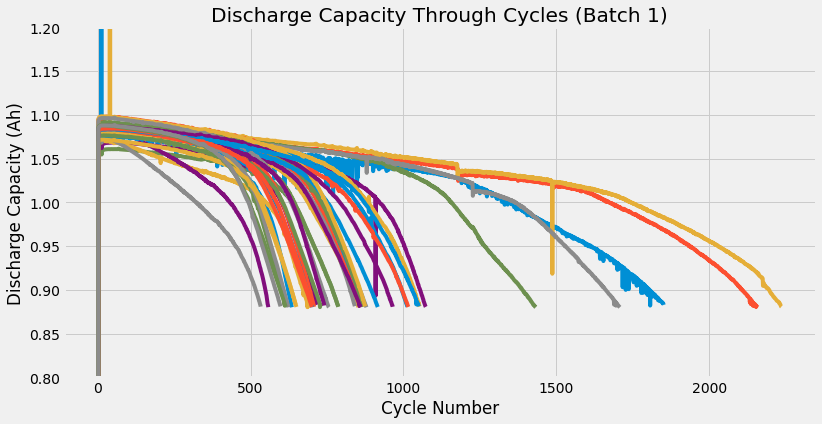

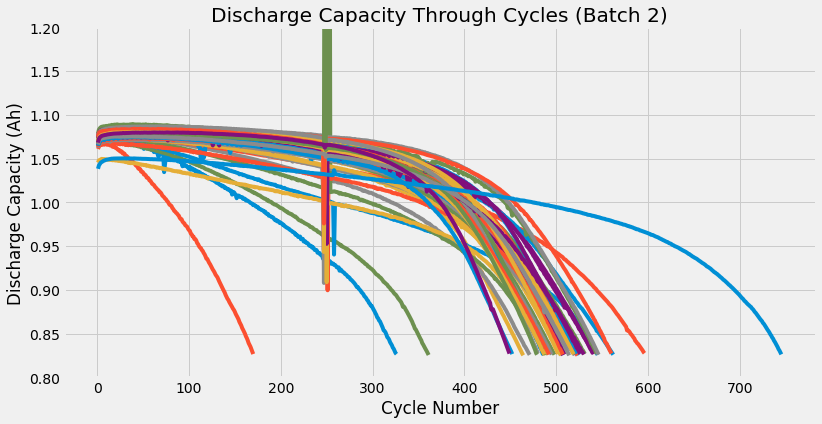

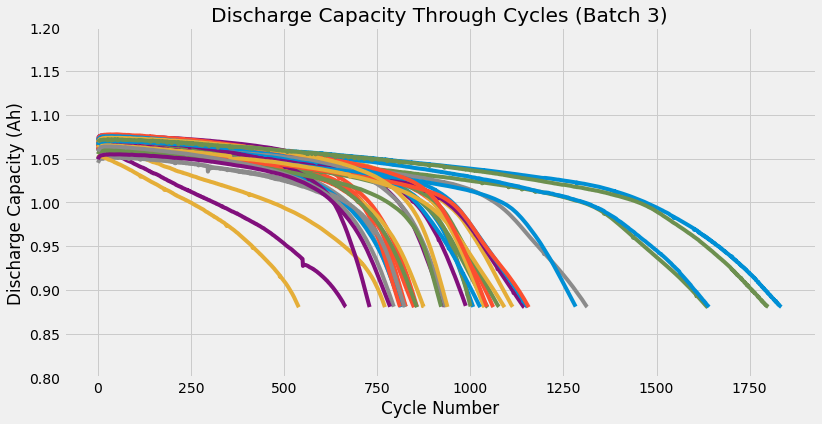

In [16]:
plt.subplots(1,1, figsize=(12,6))
for i in batch1.keys():
    plt.plot(batch1[i]['summary']['cycle'], batch1[i]['summary']['QD'])
plt.ylim(0.8,1.2)
plt.title('Discharge Capacity Through Cycles (Batch 1)')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

plt.subplots(1,1, figsize=(12,6))
for i in batch2.keys():
    plt.plot(batch2[i]['summary']['cycle'], batch2[i]['summary']['QD'])
plt.ylim(0.8,1.2)
plt.title('Discharge Capacity Through Cycles (Batch 2)')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

plt.subplots(1,1, figsize=(12,6))
for i in batch3.keys():
    plt.plot(batch3[i]['summary']['cycle'], batch3[i]['summary']['QD'])
plt.ylim(0.8,1.2)
plt.title('Discharge Capacity Through Cycles (Batch 3)')
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

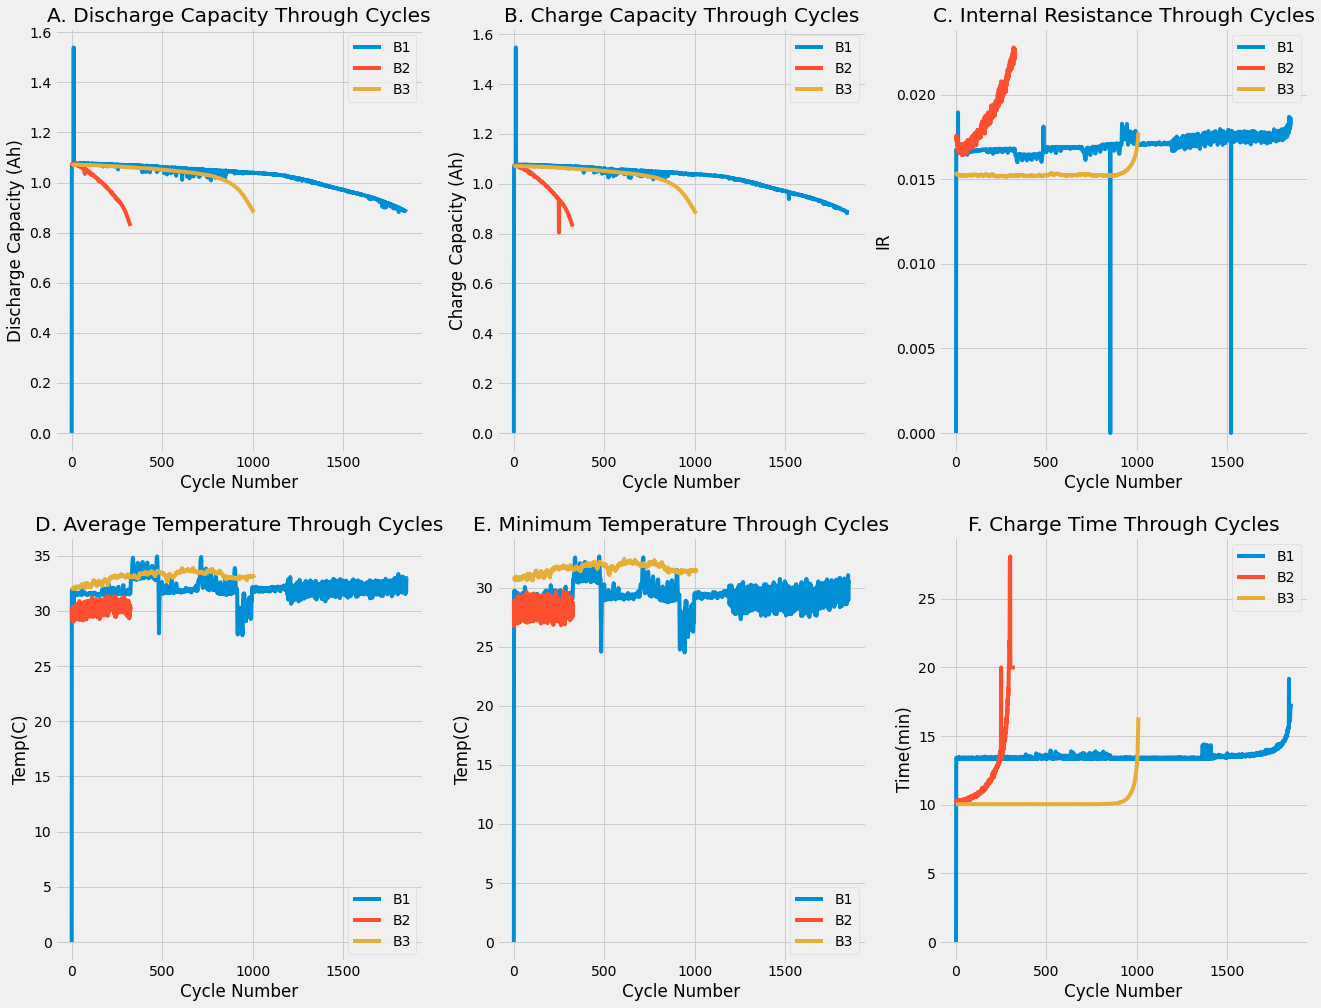

In [17]:
fig, axes= plt.subplots(2,3, figsize=(20,16))
axes = axes.flatten()
axes[0].plot(batch1['b1c0']['summary']['cycle'], batch1['b1c0']['summary']['QD'], label='B1')
axes[0].plot(batch2['b2c0']['summary']['cycle'], batch2['b2c0']['summary']['QD'], label='B2')
axes[0].plot(batch3['b3c0']['summary']['cycle'], batch3['b3c0']['summary']['QD'], label='B3')
axes[0].set(title='A. Discharge Capacity Through Cycles', xlabel='Cycle Number', ylabel='Discharge Capacity (Ah)')
axes[0].legend()

axes[1].plot(batch1['b1c0']['summary']['cycle'], batch1['b1c0']['summary']['QC'], label='B1')
axes[1].plot(batch2['b2c0']['summary']['cycle'], batch2['b2c0']['summary']['QC'], label='B2')
axes[1].plot(batch3['b3c0']['summary']['cycle'], batch3['b3c0']['summary']['QD'], label='B3')
axes[1].set(title='B. Charge Capacity Through Cycles', xlabel='Cycle Number', ylabel='Charge Capacity (Ah)')
axes[1].legend()

axes[2].plot(batch1['b1c0']['summary']['cycle'], batch1['b1c0']['summary']['IR'], label='B1')
axes[2].plot(batch2['b2c0']['summary']['cycle'], batch2['b2c0']['summary']['IR'], label='B2')
axes[2].plot(batch3['b3c0']['summary']['cycle'], batch3['b3c0']['summary']['IR'], label='B3')
axes[2].set(title='C. Internal Resistance Through Cycles', xlabel='Cycle Number', ylabel='IR')
axes[2].legend()

axes[3].plot(batch1['b1c0']['summary']['cycle'], batch1['b1c0']['summary']['Tavg'], label='B1')
axes[3].plot(batch2['b2c0']['summary']['cycle'], batch2['b2c0']['summary']['Tavg'], label='B2')
axes[3].plot(batch3['b3c0']['summary']['cycle'], batch3['b3c0']['summary']['Tavg'], label='B3')
axes[3].set(title='D. Average Temperature Through Cycles', xlabel='Cycle Number', ylabel='Temp(C)')
axes[3].legend()

axes[4].plot(batch1['b1c0']['summary']['cycle'], batch1['b1c0']['summary']['Tmin'], label='B1')
axes[4].plot(batch2['b2c0']['summary']['cycle'], batch2['b2c0']['summary']['Tmin'], label='B2')
axes[4].plot(batch3['b3c0']['summary']['cycle'], batch3['b3c0']['summary']['Tmin'], label='B3')
axes[4].set(title='E. Minimum Temperature Through Cycles', xlabel='Cycle Number', ylabel='Temp(C)')
axes[4].legend()

axes[5].plot(batch1['b1c0']['summary']['cycle'], batch1['b1c0']['summary']['chargetime'], label='B1')
axes[5].plot(batch2['b2c0']['summary']['cycle'], batch2['b2c0']['summary']['chargetime'], label='B2')
axes[5].plot(batch3['b3c0']['summary']['cycle'], batch3['b3c0']['summary']['chargetime'], label='B3')
axes[5].set(title='F. Charge Time Through Cycles', xlabel='Cycle Number', ylabel='Time(min)')
axes[5].legend()

In [18]:
#function that compiles all the summary features from each battery, adding "id" labels and their cycle life
def all_features(batch, new_df):
    for i in batch.keys():
        df = pd.DataFrame(batch[i]['summary'])
        df['id'] = str(i)
        df['cycle_life'] = int(batch[i]['cycle_life'])
        new_df = pd.concat([new_df,df])
    return new_df

#initializing empty DataFrame with correct column labels
df1 = pd.DataFrame(columns=batch1['b1c0']['summary'].keys())
Batch1 = all_features(batch1, df1)
Batch1 = Batch1.drop(Batch1.index[0])
Batch1

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,id,cycle_life
1,0.016742,1.071042,1.070689,31.875011,29.56613,35.652016,13.34125,2.0,b1c0,1852.0
2,0.016724,1.071674,1.0719,31.93149,29.604385,35.692978,13.425777,3.0,b1c0,1852.0
3,0.016681,1.072304,1.07251,31.932603,29.744202,35.680588,13.425167,4.0,b1c0,1852.0
4,0.016662,1.07297,1.073174,31.959322,29.644709,35.728691,13.341442,5.0,b1c0,1852.0
5,0.016623,1.073491,1.073576,31.961062,29.752932,35.711758,13.340835,6.0,b1c0,1852.0
...,...,...,...,...,...,...,...,...,...,...
593,0.020337,0.887369,0.885883,33.709809,30.059217,38.676792,19.923232,594.0,b1c45,599.0
594,0.020473,0.885484,0.884301,33.727794,30.237862,38.678028,20.731932,595.0,b1c45,599.0
595,0.020493,0.884648,0.883173,33.630904,30.104025,38.663055,22.061037,596.0,b1c45,599.0
596,0.020503,0.883895,0.882425,33.715893,30.051764,38.717087,22.810185,597.0,b1c45,599.0


In [19]:
#The same process is repreated for batteries in Batch 2 and Batch 3
Batch2 = all_features(batch2, df1)
Batch3 = all_features(batch3, df1)

Text(0, 0.5, 'Cycle Life')

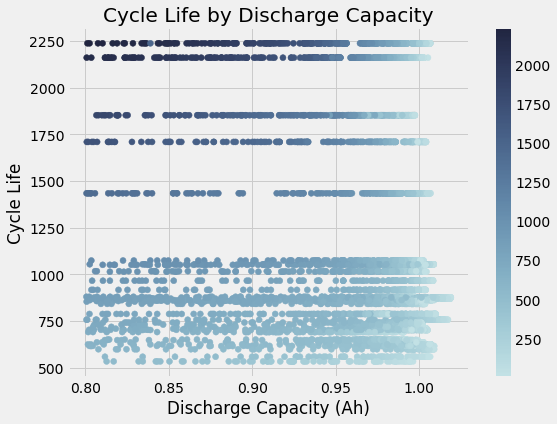

In [20]:
np.random.seed(30)
QD_jittered = Batch1.copy().sample(5000)
QD_jittered['QD'] = QD_jittered.loc[:, 'QD'] + np.random.normal(0, 0.05)

plt.subplots(1,1, figsize=(8,6))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
points = plt.scatter(QD_jittered['QD'], QD_jittered['cycle_life'], c=QD_jittered['cycle'], cmap=cmap)
plt.colorbar(points)
plt.title('Cycle Life by Discharge Capacity')
plt.xlabel('Discharge Capacity (Ah)')
plt.ylabel('Cycle Life')

# Modeling and Analysis 

In [21]:
under100_b1 = Batch1[Batch1['cycle'] <= 100]
under100_b2 = Batch2[Batch2['cycle'] <= 100]
under100_b3 = Batch3[Batch3['cycle'] <= 100]

#This is the DataFrame that will be used in regression. 
under100_all = pd.concat([under100_b1, under100_b2, under100_b3])
X = under100_all.drop(columns=['cycle_life', 'id'])
y = under100_all[['cycle_life']]
X.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
1,0.016742,1.071042,1.070689,31.875011,29.56613,35.652016,13.34125,2.0
2,0.016724,1.071674,1.0719,31.93149,29.604385,35.692978,13.425777,3.0
3,0.016681,1.072304,1.07251,31.932603,29.744202,35.680588,13.425167,4.0
4,0.016662,1.07297,1.073174,31.959322,29.644709,35.728691,13.341442,5.0
5,0.016623,1.073491,1.073576,31.961062,29.752932,35.711758,13.340835,6.0


**To perform modeling and analysis on our dataset, the dataset will be split into a training, validation, and test set:**
- Training set 70%
- Validation set 15%
- Test set 15%

In [22]:
# Train/Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = .70, test_size = .30)

# Test/Validation Split
Xtest, Xvalidate, ytest, yvalidate = train_test_split(Xtest, ytest, train_size = .50, test_size = .50)

# Verifying the shape of each split. 
Xtrain.shape, Xtest.shape, Xvalidate.shape, ytrain.shape, ytest.shape, yvalidate.shape

((8651, 8), (1854, 8), (1854, 8), (8651, 1), (1854, 1), (1854, 1))

For comparison with the model used by Severson et al., the same train/test split will be created using the indices below: 


In [23]:
test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat);

len(test_ind), len(train_ind), len(secondary_test_ind)

(43, 41, 40)

## Oversampling Higher Cycle Life Values in Training Set 

A "high" cycle life is defined as having a cycle life of >1500 cycles. As seen below, the high cycle life cases only make up a small proportion of all batteries. The actual random seed that was used to create Xtrain and ytrain has an even smaller proportion of high cycle life.

In [24]:
high_cycle_life = under100_all[under100_all['cycle_life']>1500]
high_train_cycle_life = ytrain[ytrain['cycle_life']>1500]

print(f'The proportion of "high" cycle life batteries: {high_cycle_life.size/under100_all.size:.3f}')
print(f'The training set proportion of "high" cycle life batteries: {high_train_cycle_life.size/ytrain.size:.3f}')

high_cycle_life

The proportion of "high" cycle life batteries: 0.064
The training set proportion of "high" cycle life batteries: 0.064


,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle,id,cycle_life
1,0.016742,1.071042,1.070689,31.875011,29.56613,35.652016,13.34125,2.0,b1c0,1852.0
2,0.016724,1.071674,1.0719,31.93149,29.604385,35.692978,13.425777,3.0,b1c0,1852.0
3,0.016681,1.072304,1.07251,31.932603,29.744202,35.680588,13.425167,4.0,b1c0,1852.0
4,0.016662,1.07297,1.073174,31.959322,29.644709,35.728691,13.341442,5.0,b1c0,1852.0
5,0.016623,1.073491,1.073576,31.961062,29.752932,35.711758,13.340835,6.0,b1c0,1852.0
...,...,...,...,...,...,...,...,...,...,...
95,0.015664,1.070937,1.071107,32.716215,30.887144,34.719825,11.038408,96.0,b3c45,1801.0
96,0.015663,1.070892,1.071012,32.707957,30.760033,34.774986,11.038703,97.0,b3c45,1801.0
97,0.015654,1.070896,1.071034,32.724436,30.741972,34.772697,11.038897,98.0,b3c45,1801.0
98,0.015659,1.070837,1.070929,32.708299,30.72463,34.854202,11.040963,99.0,b3c45,1801.0


In [25]:
X = under100_all.drop(columns=['cycle_life', 'id'])
y = under100_all[['cycle_life']]

#to remind us of the exact split used in the models above
Xtrain.shape, Xtest.shape, Xvalidate.shape, ytrain.shape, ytest.shape, yvalidate.shape

((8651, 8), (1854, 8), (1854, 8), (8651, 1), (1854, 1), (1854, 1))

**To increase the number of high cycle life batteries in our new training set, all high cycle life cases from the original dataset will be used.**  

In [26]:
np.random.seed(30)
oversampled = pd.concat([under100_all.sample(8251), high_cycle_life])

Xtrain_oversampled = oversampled.drop(columns=['cycle_life', 'id', 'cycle'])
ytrain_oversampled = oversampled[['cycle_life']]

print(Xtrain_oversampled.shape)

(9047, 7)


In [27]:
high_clife = oversampled[oversampled['cycle_life'] >1500].size
print(f'The proportion of "high" cycle life batteries: {high_clife/under100_all.size:.3f}')

The proportion of "high" cycle life batteries: 0.108


Now, using the power basis function again: 

In [28]:
Xtrain_oversampled_power = []
for i in range(4):
    Xtrain_oversampled_power.append(np.hstack([Xtrain_oversampled**(j+1) for j in range(0,i+1)]))
for i in range(4):
    print(Xtrain_oversampled_power[i].shape)

(9047, 7)
(9047, 14)
(9047, 21)
(9047, 28)


In [29]:
model = LinearRegression()
fittedmodel_oversampled = model.fit(Xtrain_oversampled_power[3], ytrain_oversampled)

X_oversampled_power = np.hstack([Xtrain_oversampled**(j+1) for j in range(4)])
oversampled_predictions = fittedmodel_oversampled.predict(X_oversampled_power)

In [30]:
Xtrain_oversampled_power[3]

array([[0.015968548, 1.0669646, 1.067852, ..., 857799.63432153,
        2233977.336644431, 10208.57176410355],
       [0.019886132, 1.9404141, 1.0695733, ..., 807446.0173937866,
        1577346.5100282498, 9507.5061274063],
       [0.014095389, 1.0613531, 1.0615698, ..., 1091478.0169741742,
        2109155.0098629566, 10301.905707840308],
       ...,
       [0.015653979, 1.0708963, 1.0710343, ..., 893155.1624395333,
        1462020.5831568402, 14849.186847155666],
       [0.015659165, 1.0708371, 1.0709292, ..., 891141.4537548115,
        1475776.4489262805, 14860.310038016582],
       [0.015662471, 1.0709304, 1.0711251, ..., 885777.7558904509,
        1469205.0802742762, 14844.398622930135]], dtype=object)

In [31]:
#Functions used in analyzing this model. 
def standard_units(x):
    return (x - x.mean()) / x.std() 

def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

def correlation(x, y):
    return np.sum(standard_units(x)*standard_units(y))/len(x)

def slope(x, y):
    return correlation(x,y)*np.std(y)/np.std(x)

In [32]:
print(f'The accuracy is: {fittedmodel_oversampled.score(Xtrain_oversampled_power[3], ytrain_oversampled)}')
print(f'The root mean squared error is: {rmse(oversampled_predictions, np.array(ytrain_oversampled))}')
print(f'The correlation between actual and predicted values is: {correlation(oversampled_predictions, np.array(ytrain_oversampled))}')

The accuracy is: 0.8090816713636766
The root mean squared error is: 204.63071594404133
The correlation between actual and predicted values is: 0.8994898905778718


# To Predict Battery Life Cycle

In [34]:
dataInput = np.array([0.015654, 1.070896, 1.071034, 32.724436, 30.741972, 34.772697, 11.038897])
dataInput = dataInput.reshape(1,-1)

dataInput = np.hstack([dataInput**(j+1) for j in range(4)])

isLifeCycle = fittedmodel_oversampled.predict(dataInput)


print("The Battery Life cycle is:", int(isLifeCycle))

The Battery Life cycle is: 1307


In [35]:
#Import dataset
import pandas as pd

excel_file=r'.\dataset\need_maintenance.xlsx'
df = pd.read_excel (excel_file, index_col=0)
df.head()

,battery,brakepad,motor
0,FAIL,NORMAL,FAIL


In [36]:
#Edit induction motor conditon in dataset
if isLifeCycle>0:
    if df.iloc[0][0]=='FAIL':
        df['battery'] = df['battery'].replace(['FAIL'],'NORMAL')
else: 
    if df.iloc[0][0]=='NORMAL':
        df['battery'] = df['battery'].replace(['NORMAL'],'FAIL')

df.to_excel(excel_file)
print(df.head())

  battery brakepad motor
0  NORMAL   NORMAL  FAIL
